In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sukhmandeepsinghbrar/car-price-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/xjama/.cache/kagglehub/datasets/sukhmandeepsinghbrar/car-price-prediction-dataset/versions/1


In [2]:
import os

# List the files in the downloaded dataset directory
files = os.listdir(path)
print("Files in dataset folder:", files)

Files in dataset folder: ['cardekho.csv']


In [3]:
!pip install kagglehub

# Read the data

In [83]:
import pandas as pd
import os

# Assuming the CSV file is in the downloaded dataset folder
csv_file = os.path.join(path, 'cardekho.csv')  # Replace with the correct file name

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,"1,248.00",74,5.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,"1,498.00",103.52,5.00
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,"1,497.00",78,5.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,"1,396.00",90,5.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,"1,298.00",88.2,5.00


# EDA

In [5]:
print(df.shape)

(8128, 12)


In [6]:
print(df.dtypes)

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object


In [7]:
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df['selling_price'].describe())

count        8,128.00
mean       638,271.81
std        806,253.40
min         29,999.00
25%        254,999.00
50%        450,000.00
75%        675,000.00
max     10,000,000.00
Name: selling_price, dtype: float64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [9]:
print(df.isnull().sum())

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


In [10]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent.round(2))

name                 0.00
year                 0.00
selling_price        0.00
km_driven            0.00
fuel                 0.00
seller_type          0.00
transmission         0.00
owner                0.00
mileage(km/ltr/kg)   2.72
engine               2.72
max_power            2.65
seats                2.72
dtype: float64


# Data Cleaning

In [11]:
df_clean = df.drop_duplicates()
print(f"Deleted {df.shape[0]-df_clean.shape[0]} duplicated rows")

Deleted 1202 duplicated rows


In [12]:
print(df.isnull().sum())

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


# EDA Plotting

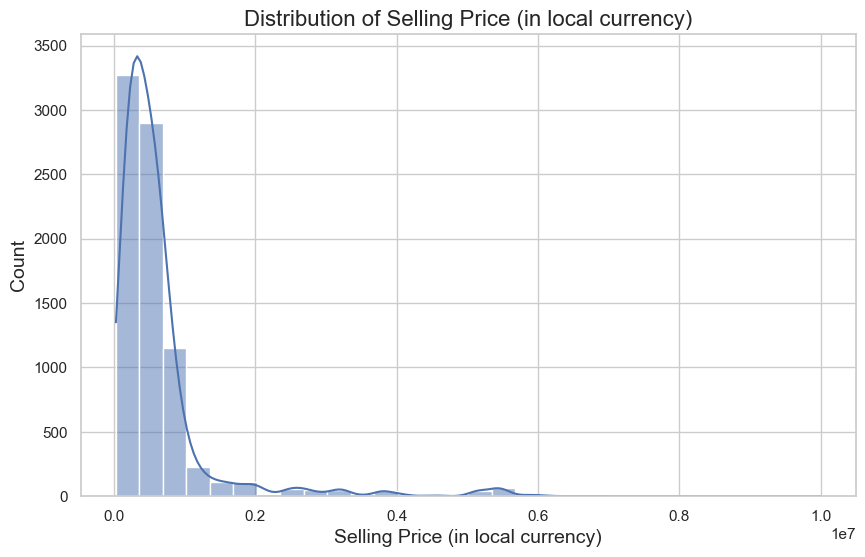

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Price (in local currency)', fontsize=16)
plt.xlabel('Selling Price (in local currency)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


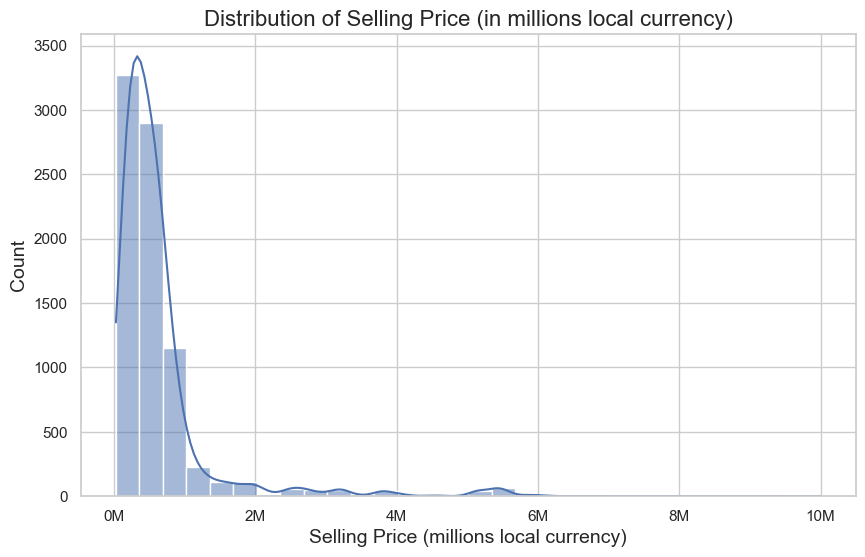

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Assuming 'df' is your DataFrame and 'selling_price' is the column of interest
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['selling_price'], bins=30, kde=True)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1e6) + 'M'))
plt.title('Distribution of Selling Price (in millions local currency)', fontsize=16)
plt.xlabel('Selling Price (millions local currency)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [69]:
import numpy as np
df['log_selling_price'] = np.log10(df['selling_price'])
df.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,log_selling_price,km_driven_k,selling_price_million,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,"1,248.00",74.00,5.00,5.65,145.50,0.45,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,"1,498.00",103.52,5.00,5.57,120.00,0.37,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,"1,497.00",78.00,5.00,5.20,140.00,0.16,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,"1,396.00",90.00,5.00,5.35,127.00,0.23,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,"1,298.00",88.20,5.00,5.11,120.00,0.13,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,"1,197.00",81.86,5.00,5.64,45.00,0.44,Hyundai
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,"1,061.00",57.50,5.00,4.98,175.00,0.10,Maruti
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.00,37.00,4.00,4.65,5.00,0.04,Maruti
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,"1,364.00",67.10,5.00,5.54,90.00,0.35,Toyota
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,"1,399.00",68.10,5.00,5.30,169.00,0.20,Ford


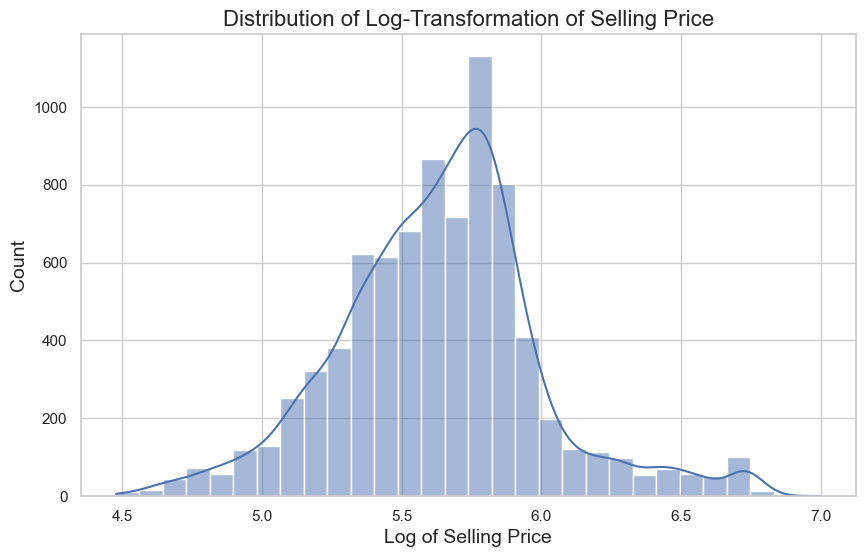

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['log_selling_price'], bins=30, kde=True)
plt.title('Distribution of Log-Transformation of Selling Price', fontsize=16)
plt.xlabel('Log of Selling Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

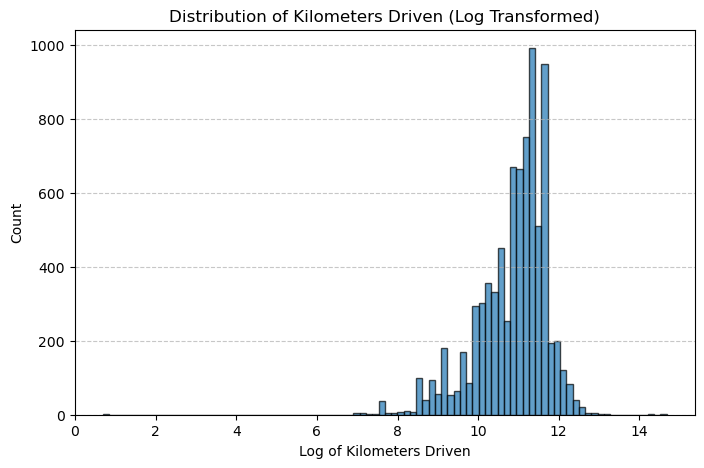

In [14]:
import numpy as np

plt.figure(figsize=(8,5))

np.log1p(df['km_driven']).plot.hist(
    bins=int(np.sqrt(df.shape[0])), 
    alpha=0.7, edgecolor='black'
)
plt.xlabel('Log of Kilometers Driven')
plt.ylabel('Count')
plt.title('Distribution of Kilometers Driven (Log Transformed)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

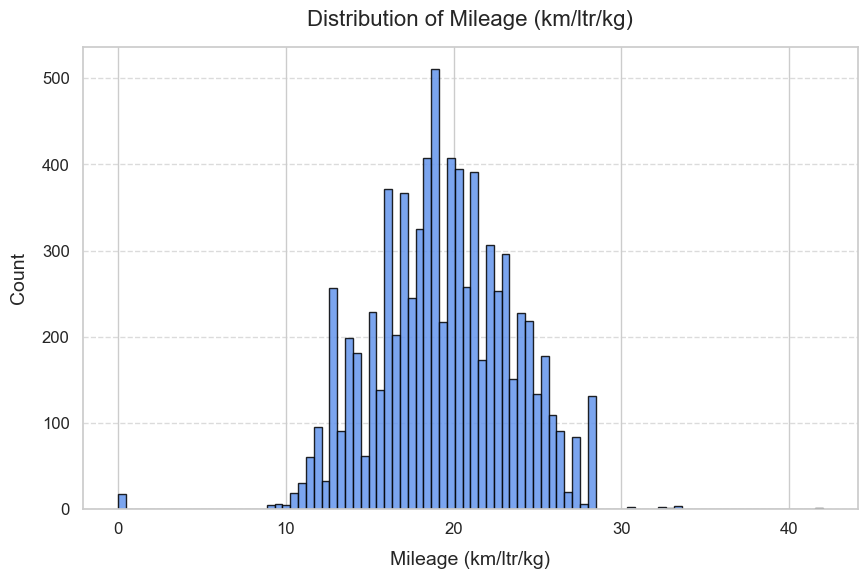

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set a seaborn style
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))

# Plot a histogram with improved aesthetics
df['mileage(km/ltr/kg)'].plot.hist(
    bins=int(np.sqrt(df.shape[0])), 
    alpha=0.85,  # Slightly reduce transparency
    color='cornflowerblue',  # Aesthetic color choice
    edgecolor='black'  # Add borders for bars
)

# Add labels and title with better formatting
plt.xlabel('Mileage (km/ltr/kg)', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.title('Distribution of Mileage (km/ltr/kg)', fontsize=16, pad=15)

# Format tick labels for better readability
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


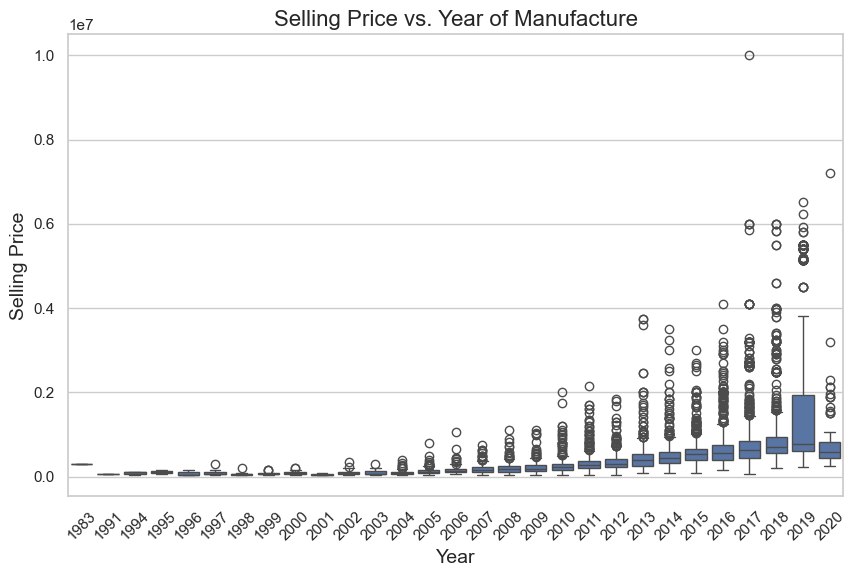

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=45)
plt.title('Selling Price vs. Year of Manufacture', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.show()


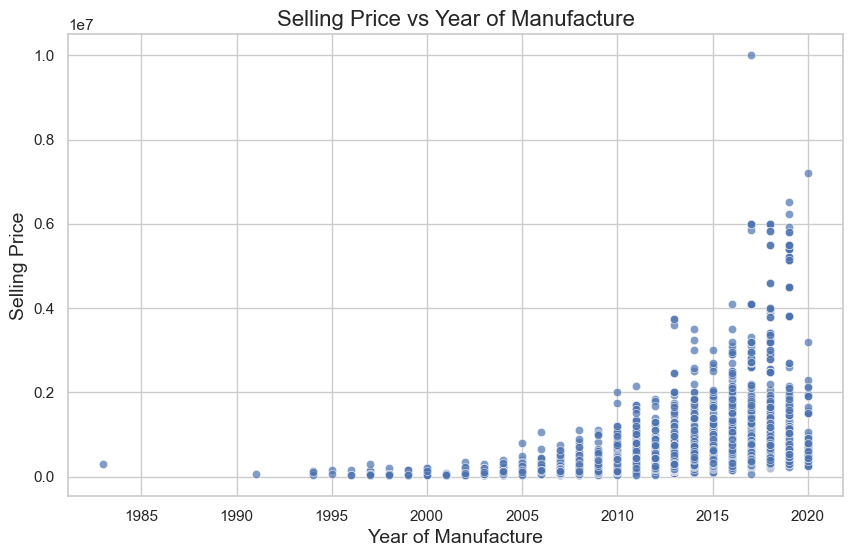

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot of selling price vs. year
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.7)

plt.title('Selling Price vs Year of Manufacture', fontsize=16)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)

# Show the plot
plt.show()


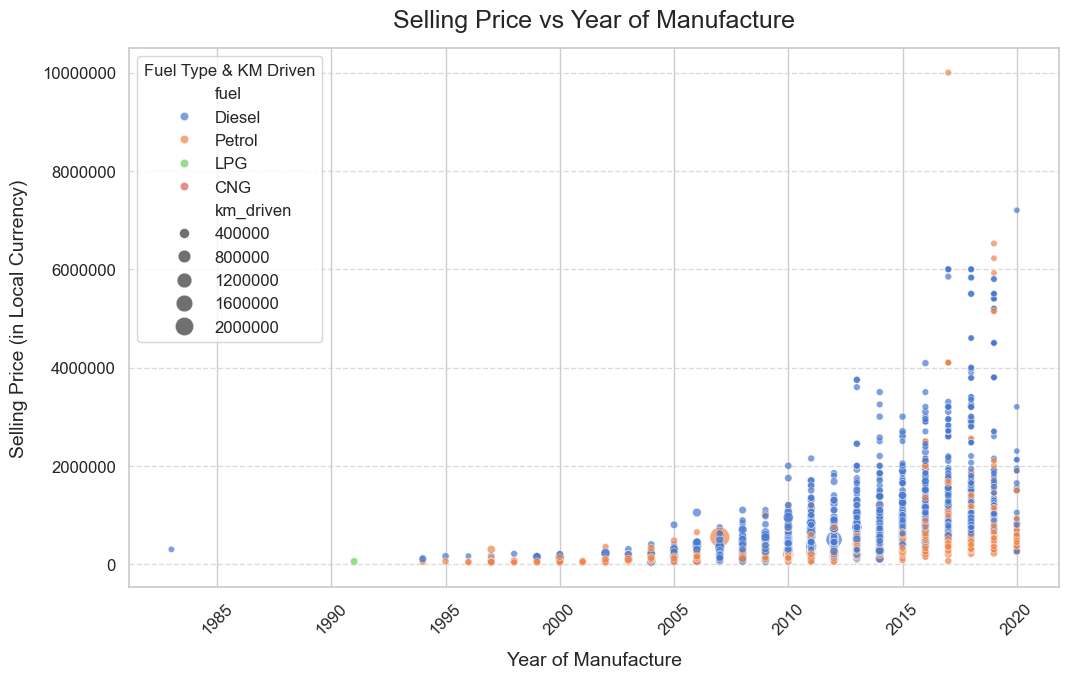

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style
sns.set(style='whitegrid')

plt.figure(figsize=(12, 7))

# Scatter plot of selling price vs year with color and size enhancements
sns.scatterplot(
    data=df, 
    x='year', 
    y='selling_price', 
    hue='fuel',  # Use color to indicate fuel type
    size='km_driven',  # Use size to reflect kilometers driven
    palette='muted', 
    sizes=(20, 200),  # Control marker sizes
    alpha=0.7, 
    legend='brief'
)

# Add titles and labels with appropriate font sizes
plt.title('Selling Price vs Year of Manufacture', fontsize=18, pad=15)
plt.xlabel('Year of Manufacture', fontsize=14, labelpad=10)
plt.ylabel('Selling Price (in Local Currency)', fontsize=14, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Place the legend in the upper left corner
plt.legend(loc='upper left', title='Fuel Type & KM Driven', fontsize=12)

# Show the plot
plt.show()


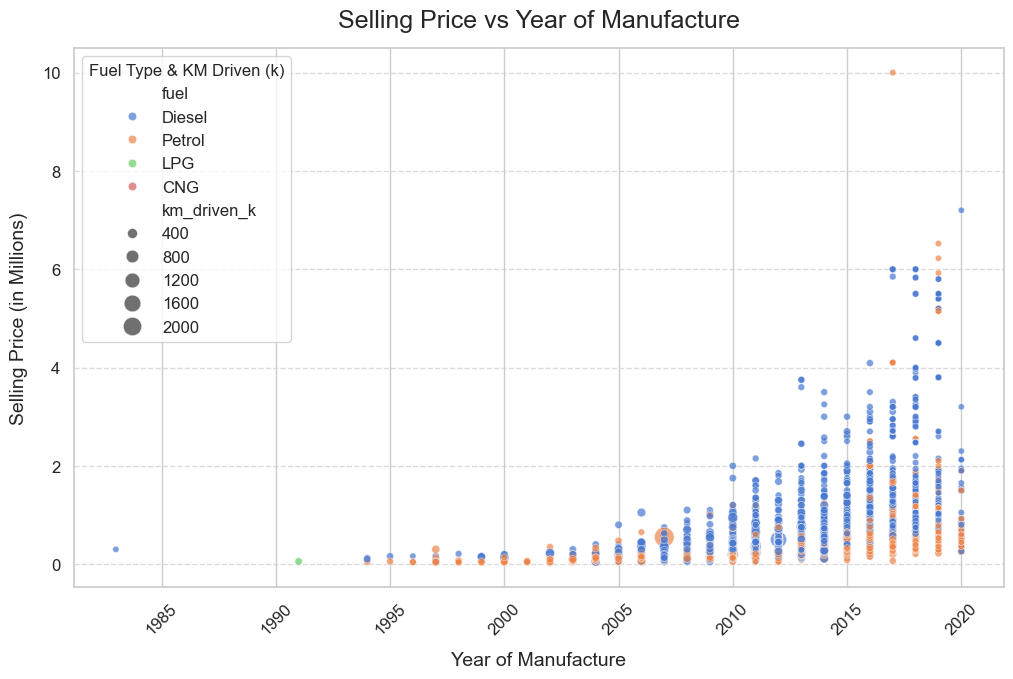

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert km_driven to thousands and selling_price to millions
df['km_driven_k'] = df['km_driven'] / 1000  # Convert to thousands
df['selling_price_million'] = df['selling_price'] / 1e6  # Convert to millions

# Set a style
sns.set(style='whitegrid')

plt.figure(figsize=(12, 7))

# Scatter plot of selling price vs year with color and size enhancements
sns.scatterplot(
    data=df, 
    x='year', 
    y='selling_price_million',  # Use selling price in millions
    hue='fuel',  # Use color to indicate fuel type
    size='km_driven_k',  # Use size to reflect kilometers driven in thousands
    palette='muted', 
    sizes=(20, 200),  # Control marker sizes
    alpha=0.7, 
    legend='brief'
)

# Add titles and labels with appropriate font sizes
plt.title('Selling Price vs Year of Manufacture', fontsize=18, pad=15)
plt.xlabel('Year of Manufacture', fontsize=14, labelpad=10)
plt.ylabel('Selling Price (in Millions)', fontsize=14, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Place the legend in the upper left corner
plt.legend(loc='upper left', title='Fuel Type & KM Driven (k)', fontsize=12)

# Show the plot
plt.show()


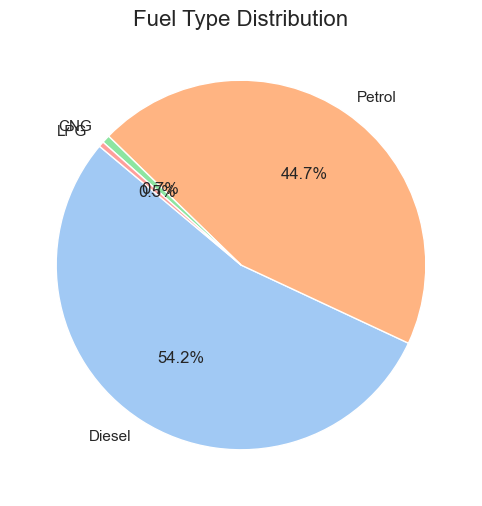

In [23]:
plt.figure(figsize=(8, 6))
df['fuel'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fuel Type Distribution', fontsize=16)
plt.ylabel('')
plt.show()


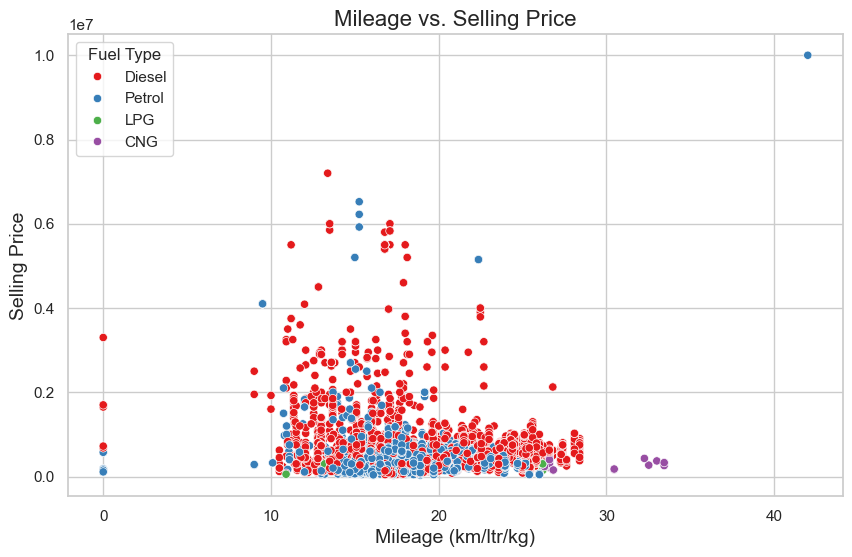

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mileage(km/ltr/kg)', y='selling_price', hue='fuel', palette='Set1')
plt.title('Mileage vs. Selling Price', fontsize=16)
plt.xlabel('Mileage (km/ltr/kg)', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.legend(title='Fuel Type')
plt.show()


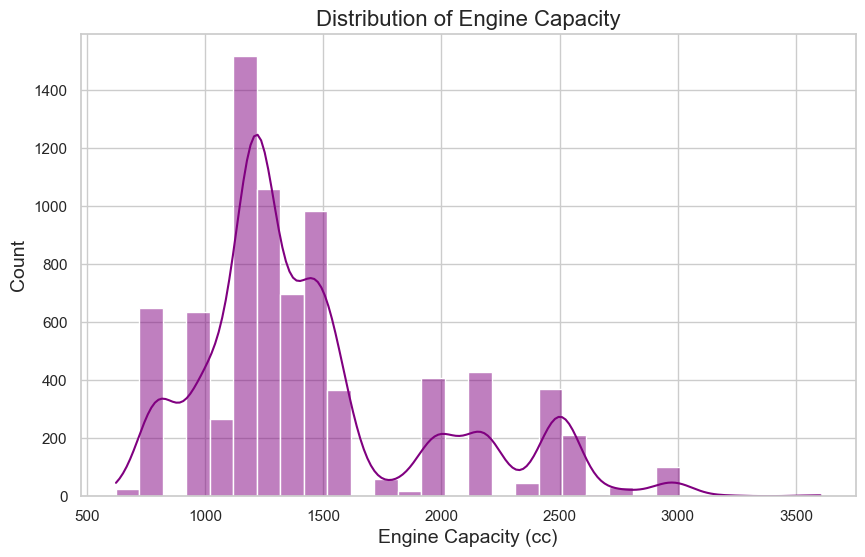

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['engine'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Engine Capacity', fontsize=16)
plt.xlabel('Engine Capacity (cc)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [26]:
print(df['name'].value_counts())

name
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: count, Length: 2058, dtype: int64


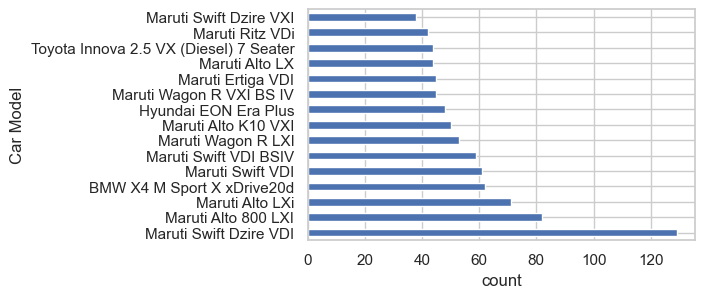

In [27]:
plt.figure(figsize=(5,3))
df['name'].value_counts().head(15).plot.barh()
plt.xlabel('count')
plt.ylabel('Car Model')
plt.show()

/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_67149/3589483605.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', 10)


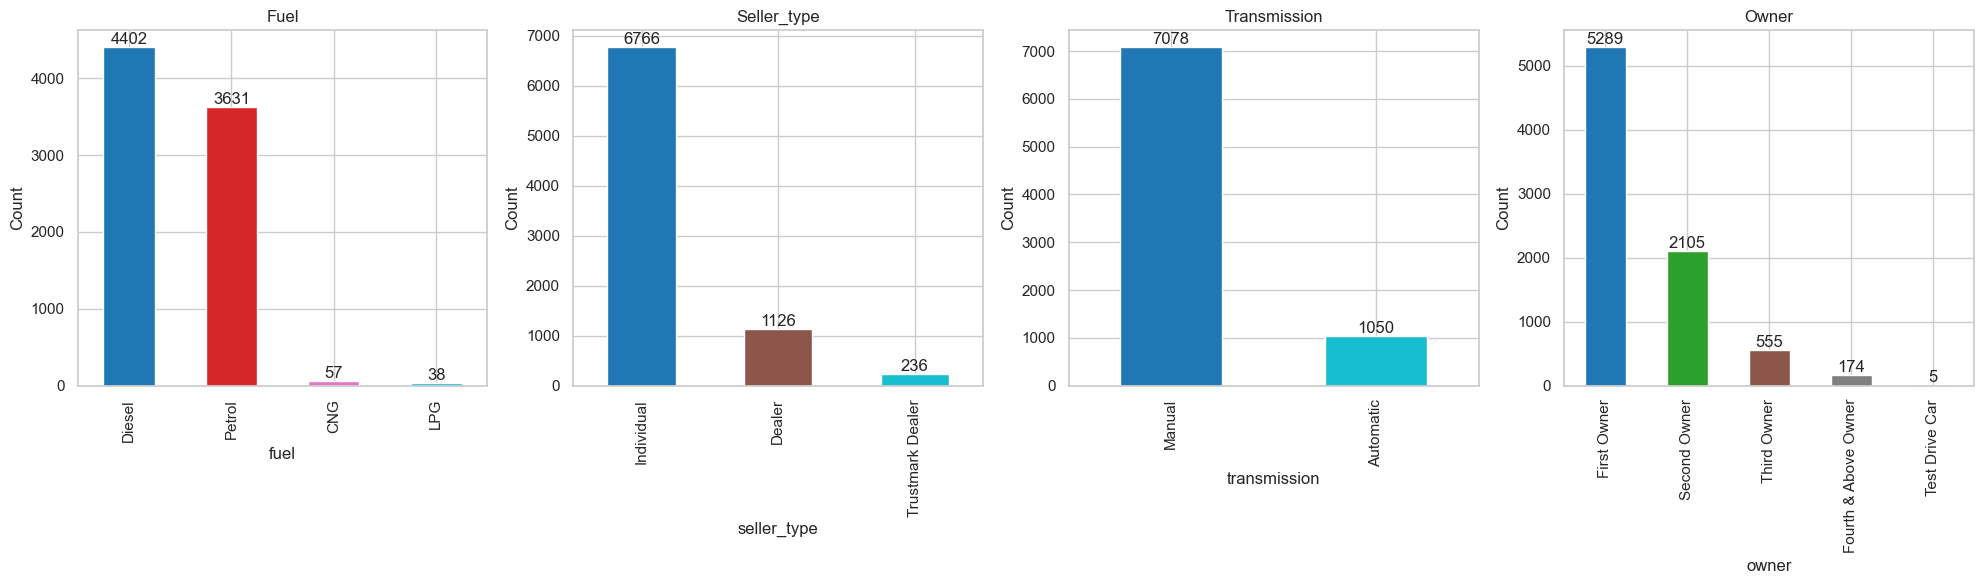

In [28]:
import matplotlib.cm as cm
categoricals = ["fuel", "seller_type", "transmission", "owner"]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

colors = cm.get_cmap('tab10', 10)

for i, j in enumerate(categoricals):
    counts = df[j].value_counts()
    counts.plot(
        kind="bar", 
        ax=axes[i], 
        color=[colors(k) for k in np.linspace(0, 1, len(counts))]
    )
    axes[i].set_ylabel("Count")  # Set y-axis label
    axes[i].set_title(j.capitalize())  # Add title for each subplot
    for container in axes[i].containers:
        axes[i].bar_label(container)

plt.tight_layout()
plt.tight_layout()
plt.show()

/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_67149/2671188537.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fuel', y='selling_price', palette='Set2')


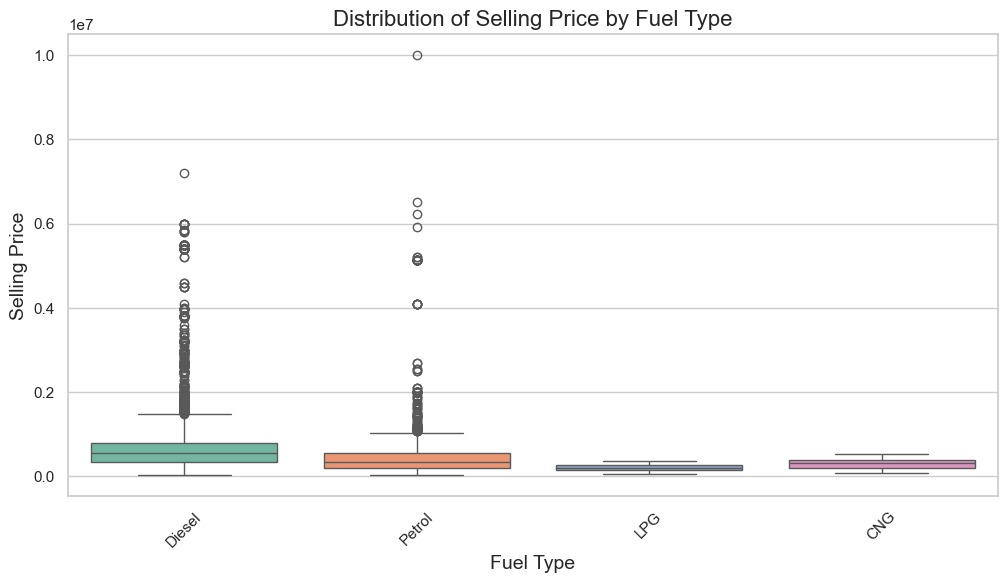

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Boxplot of selling_price by fuel type
sns.boxplot(data=df, x='fuel', y='selling_price', palette='Set2')

plt.title('Distribution of Selling Price by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)
plt.show()



/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_67149/4179563685.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='seller_type', y='selling_price', palette='Set2')


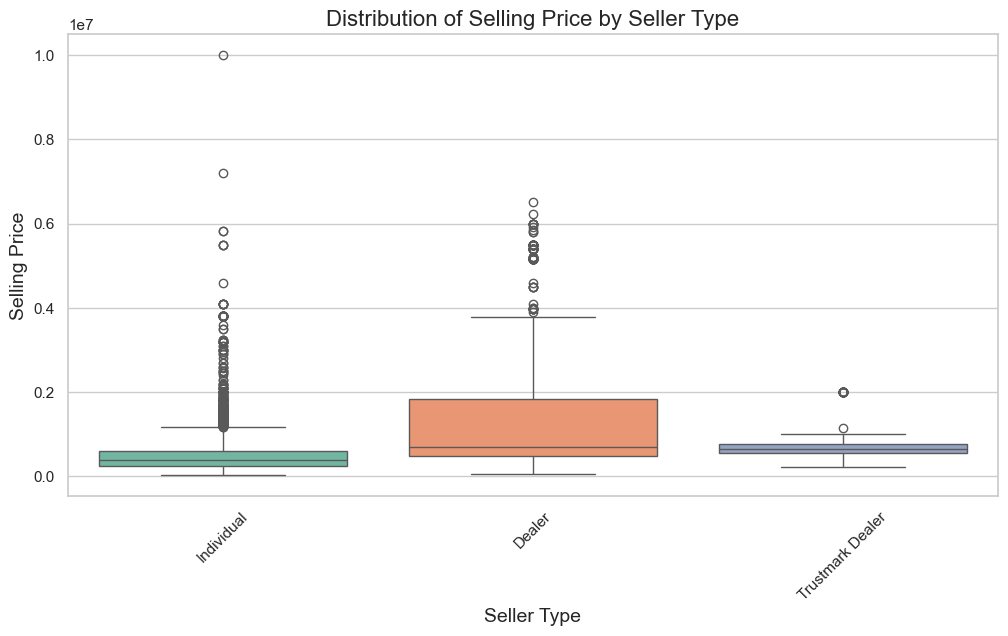

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Boxplot of selling_price by seller_type
sns.boxplot(data=df, x='seller_type', y='selling_price', palette='Set2')

plt.title('Distribution of Selling Price by Seller Type', fontsize=16)
plt.xlabel('Seller Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)
plt.show()


/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_67149/2293115583.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='transmission', y='selling_price', palette='Set2')


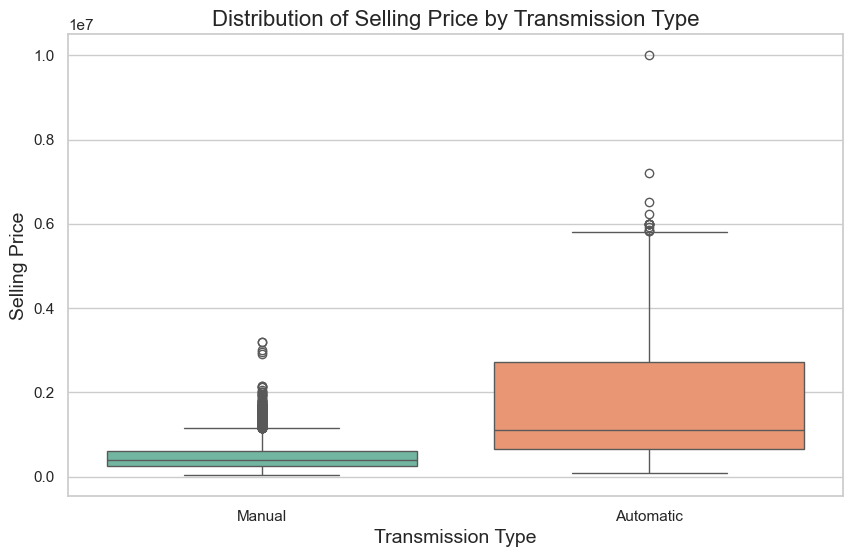

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Boxplot of selling_price by transmission type
sns.boxplot(data=df, x='transmission', y='selling_price', palette='Set2')

plt.title('Distribution of Selling Price by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)

# Show the plot
plt.show()


/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_67149/2464039767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='transmission', y='selling_price', palette='muted')


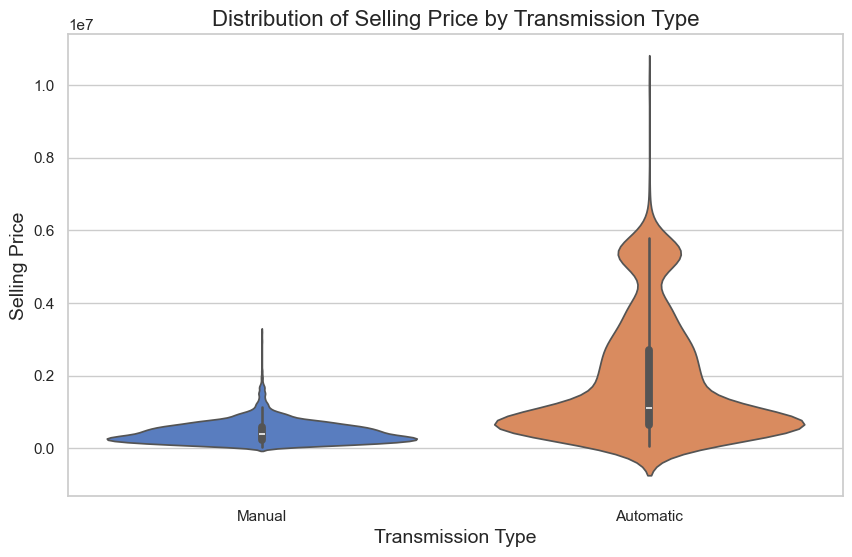

In [32]:
plt.figure(figsize=(10, 6))

# Violin plot of selling_price by transmission type
sns.violinplot(data=df, x='transmission', y='selling_price', palette='muted')

plt.title('Distribution of Selling Price by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)

# Show the plot
plt.show()


/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_67149/512423954.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='owner', y='selling_price', palette='Set2')


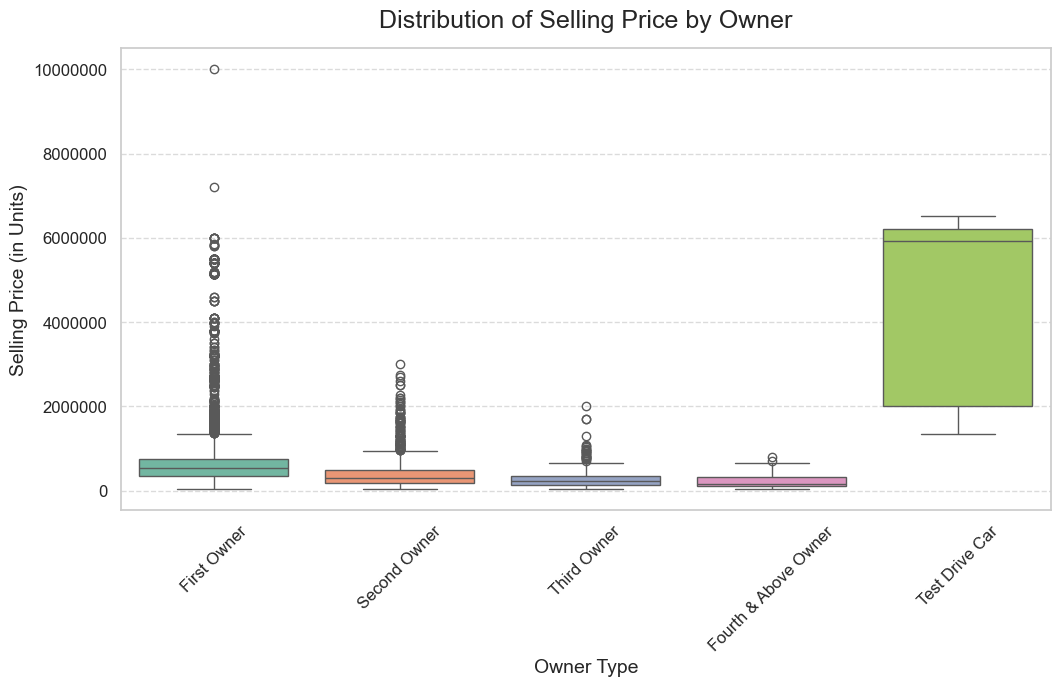

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Improved boxplot of selling_price by owner
sns.boxplot(data=df, x='owner', y='selling_price', palette='Set2')

# Set title and labels with improved font sizes
plt.title('Distribution of Selling Price by Owner', fontsize=18, pad=15)
plt.xlabel('Owner Type', fontsize=14)
plt.ylabel('Selling Price (in Units)', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


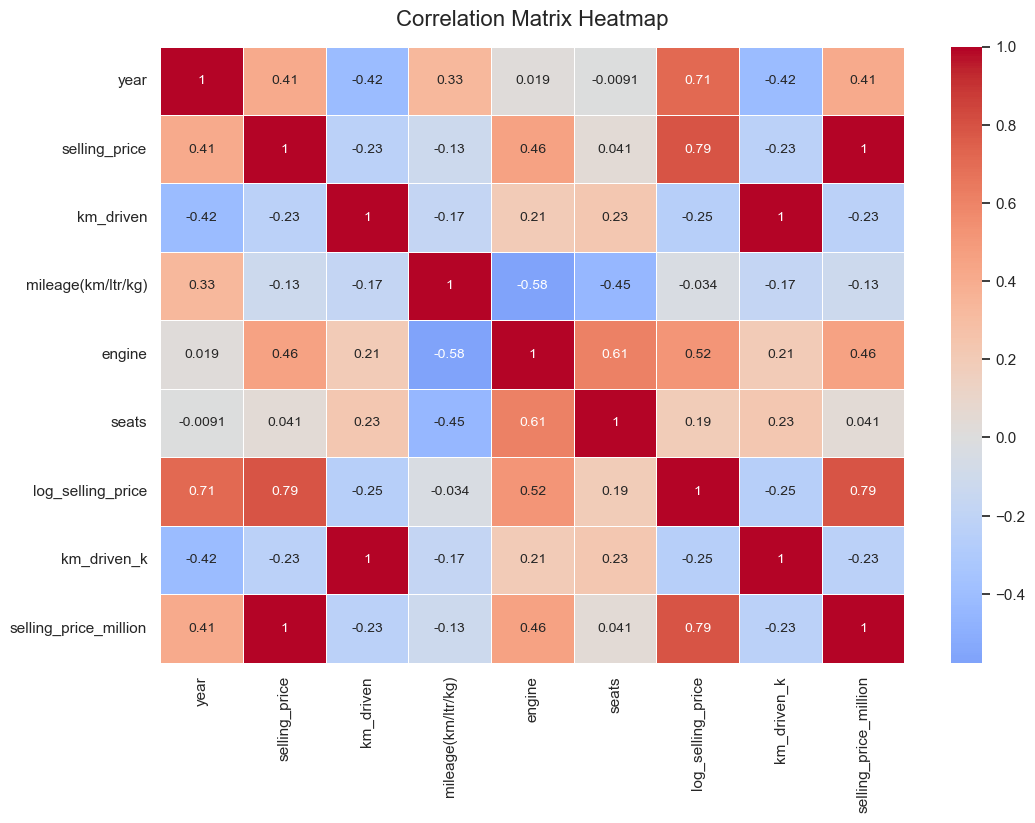

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,  # Display correlation values in cells
    cmap='coolwarm',  # Diverging colormap
    center=0,  # Center at 0 for balanced color gradient
    linewidths=0.5,  # Line width between cells
    annot_kws={"size": 10}  # Font size for annotations
)

# Add a title
plt.title('Correlation Matrix Heatmap', fontsize=16, pad=15)

plt.show()

In [35]:
import pandas as pd

# Assuming df is your DataFrame name
df = df.rename(columns={'name': 'model'})  # Renaming the 'name' column to 'model'

# Extracting the brand from the 'model' column
df['brand'] = df['model'].apply(lambda x: x.split()[0])

# Now df will have an additional column 'brand' containing only the car brands
print(df[['model', 'brand']])

# Drop the 'model' column from the DataFrame
df = df.drop(columns=['model'])

# Now df will only have the 'brand' column
print(df)

                             model    brand
0           Maruti Swift Dzire VDI   Maruti
1     Skoda Rapid 1.5 TDI Ambition    Skoda
2         Honda City 2017-2020 EXi    Honda
3        Hyundai i20 Sportz Diesel  Hyundai
4           Maruti Swift VXI BSIII   Maruti
...                            ...      ...
8123             Hyundai i20 Magna  Hyundai
8124         Hyundai Verna CRDi SX  Hyundai
8125        Maruti Swift Dzire ZDi   Maruti
8126               Tata Indigo CR4     Tata
8127               Tata Indigo CR4     Tata

[8128 rows x 2 columns]
      year  selling_price  km_driven    fuel seller_type transmission  \
0     2014         450000     145500  Diesel  Individual       Manual   
1     2014         370000     120000  Diesel  Individual       Manual   
2     2006         158000     140000  Petrol  Individual       Manual   
3     2010         225000     127000  Diesel  Individual       Manual   
4     2007         130000     120000  Petrol  Individual       Manual   
...    ..

In [36]:
print(len(df['brand'].value_counts()))

32


In [37]:
df.dtypes

year                       int64
selling_price              int64
km_driven                  int64
fuel                      object
seller_type               object
transmission              object
owner                     object
mileage(km/ltr/kg)       float64
engine                   float64
max_power                 object
seats                    float64
log_selling_price        float64
km_driven_k              float64
selling_price_million    float64
brand                     object
dtype: object

In [38]:
# Convert max_power to a numeric type, setting errors='coerce' will convert non-convertibles to NaN
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

# Now you can check how many values were non-convertible
print("Number of NaNs after conversion:", df['max_power'].isna().sum())

Number of NaNs after conversion: 216


In [39]:
df['mileage(km/ltr/kg)'].isna().sum()

221

In [40]:
df['seats'].isna().sum()

221

In [41]:
df['max_power'].isna().sum()

216

In [42]:
df.dtypes

year                       int64
selling_price              int64
km_driven                  int64
fuel                      object
seller_type               object
transmission              object
owner                     object
mileage(km/ltr/kg)       float64
engine                   float64
max_power                float64
seats                    float64
log_selling_price        float64
km_driven_k              float64
selling_price_million    float64
brand                     object
dtype: object

## KNN Model Pipeline

In [45]:
X = df.drop(columns=['selling_price','selling_price_million', 'km_driven_k', 'log_selling_price'])  # All other columns as features
y = df['log_selling_price']  # Target variable

X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,"1,248.00",74.00,5.00,Maruti
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,"1,498.00",103.52,5.00,Skoda
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,"1,497.00",78.00,5.00,Honda
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,"1,396.00",90.00,5.00,Hyundai
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,"1,298.00",88.20,5.00,Maruti


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import numpy as np

ordinal_ftrs = ['owner'] 
ordinal_cats = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']]
onehot_ftrs = ['fuel', 'seller_type', 'transmission', 'brand']
minmax_ftrs = ['mileage(km/ltr/kg)','max_power','seats']
std_ftrs = ['year', 'km_driven', 'engine']


# Preprocessor as defined
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), minmax_ftrs),
        ('std', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), std_ftrs)
    ])

random_state = 42


X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)

kf = KFold(n_splits=5,shuffle=True,random_state=random_state)

for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
print('   training set:',X_train.shape, y_train.shape) 
print('   validation set:',X_val.shape, y_val.shape)

# Fit and transform the data using only the preprocessor to inspect the transformed feature set
preprocessor.fit(X_train)  # Assuming X_train is already defined
X_train_transformed = preprocessor.transform(X_train)

# Convert the output back to a DataFrame for easy viewing
# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for the transformed features to see what they look like
transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
print(transformed_df.head())
print("Transformed feature shape:", transformed_df.shape)


   training set: (5202, 11) (5202,)
   validation set: (1300, 11) (1300,)
   ord__owner  onehot__fuel_CNG  onehot__fuel_Diesel  onehot__fuel_LPG  \
0        1.00              0.00                 0.00              0.00   
1        2.00              0.00                 0.00              0.00   
2        4.00              0.00                 1.00              0.00   
3        1.00              0.00                 0.00              0.00   
4        1.00              0.00                 1.00              0.00   

   onehot__fuel_Petrol  onehot__seller_type_Dealer  \
0                 1.00                        0.00   
1                 1.00                        0.00   
2                 0.00                        0.00   
3                 1.00                        0.00   
4                 0.00                        0.00   

   onehot__seller_type_Individual  onehot__seller_type_Trustmark Dealer  \
0                            1.00                                  0.00   
1     

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import numpy as np



ordinal_ftrs = ['owner'] 
ordinal_cats = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']]
onehot_ftrs = ['fuel', 'seller_type', 'transmission', 'brand']
minmax_ftrs = ['mileage(km/ltr/kg)','max_power','seats']
std_ftrs = ['year', 'km_driven', 'engine']


# Preprocessor as defined
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), minmax_ftrs),
        ('std', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), std_ftrs)
    ])


# Correct parameter grid for KNN in the pipeline
param_grid_knn = {
    'kneighborsregressor__n_neighbors': [3, 5, 7, 10, 30, 100],
    'kneighborsregressor__weights': ['uniform', 'distance']
}

KNN_Score = []
KNN_Final_Model = []
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []
random_states = [42,43,44,45,46]

for random_state in random_states:
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)

    kf = KFold(n_splits=5,shuffle=True,random_state=random_state)

    pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('kneighborsregressor', KNeighborsRegressor())
    ])

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Save and print results
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))

    # Save the final model and compute test score
    KNN_Final_Model.append(grid_search)
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)


average_mse = np.mean(mse_scores)
st_mse = np.std(mse_scores)
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)


print(f'Average MSE: {average_mse}')
print(f'Average RMSE: {average_rmse}')
print(f'Average MAE: {average_mae}')
print(f'Average R²: {average_r2}')
print(f'Standard Deviation : {st_mse}')

Best parameters: {'kneighborsregressor__n_neighbors': 10, 'kneighborsregressor__weights': 'distance'}
Best cross-validation score: 0.01
Best parameters: {'kneighborsregressor__n_neighbors': 10, 'kneighborsregressor__weights': 'distance'}
Best cross-validation score: 0.01
Best parameters: {'kneighborsregressor__n_neighbors': 10, 'kneighborsregressor__weights': 'distance'}
Best cross-validation score: 0.01
Best parameters: {'kneighborsregressor__n_neighbors': 10, 'kneighborsregressor__weights': 'distance'}
Best cross-validation score: 0.01
Best parameters: {'kneighborsregressor__n_neighbors': 10, 'kneighborsregressor__weights': 'distance'}
Best cross-validation score: 0.01
Average MSE: 0.005721735284933511
Average RMSE: 0.07368300425810223
Average MAE: 0.03700154030439076
Average R²: 0.9563098232224926
Standard Deviation : 0.002947786080368146


## Linear regression Model Pipeline

In [104]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

ordinal_ftrs = ['owner'] 
ordinal_cats = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']]
onehot_ftrs = ['fuel', 'seller_type', 'transmission', 'brand']
minmax_ftrs = ['mileage(km/ltr/kg)','max_power','seats']
std_ftrs = ['year', 'km_driven', 'engine']


# Preprocessor as defined
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), minmax_ftrs),
        ('std', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), std_ftrs)
    ])

# Correct parameter grid for in the pipeline
param_grid = [
    {'regressor': [Ridge()],
     'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    {'regressor': [Lasso()],
     'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    {'regressor': [ElasticNet()],
     'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
     'regressor__l1_ratio': [0.2, 0.5, 0.8]}
]
LinearRegression_Score = []
LinearRegression_Final_Model = []
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []
random_states = [42,43,44,45,46]

for random_state in random_states:
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)

    kf = KFold(n_splits=5,shuffle=True,random_state=random_state)

    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())  # Default placeholder, will be overridden in GridSearchCV
    ])

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs = -1)
    grid_search.fit(X_train, y_train)

# Output best model found
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))

    # Save the final model and compute test score
    LinearRegression_Final_Model.append(grid_search)
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)


average_mse = np.mean(mse_scores)
st_mse = np.std(mse_scores)
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)


print(f'Average MSE: {average_mse}')
print(f'Average RMSE: {average_rmse}')
print(f'Average MAE: {average_mae}')
print(f'Average R²: {average_r2}')
print(f'Standard Deviation : {st_mse}')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'regressor': Ridge(), 'regressor__alpha': 0.01}
Best cross-validation score: 0.01
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'regressor': Ridge(), 'regressor__alpha': 0.01}
Best cross-validation score: 0.01
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'regressor': Ridge(), 'regressor__alpha': 0.01}
Best cross-validation score: 0.01
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'regressor': Ridge(), 'regressor__alpha': 0.01}
Best cross-validation score: 0.01
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'regressor': Ridge(), 'regressor__alpha': 0.01}
Best cross-validation score: 0.01
Average MSE: 0.012242912895345062
Average RMSE: 0.11063744628460763
Average MAE: 0.08327183328963486
Average R²: 0.907040971671804
Standard Deviation : 0.0003364656409532196


## SVM

In [105]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

ordinal_ftrs = ['owner'] 
ordinal_cats = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']]
onehot_ftrs = ['fuel', 'seller_type', 'transmission', 'brand']
minmax_ftrs = ['mileage(km/ltr/kg)','max_power','seats']
std_ftrs = ['year', 'km_driven', 'engine']


# Preprocessor as defined
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), minmax_ftrs),
        ('std', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), std_ftrs)
    ])

# Correct parameter grid for KNN in the pipeline
param_grid_svr = [
    {
        'svr__C': [0.01, 0.1, 1, 10, 100],
        'svr__gamma': [0.01, 0.1, 1, 10, 100]
    }
]

SVM_Final_Model = []
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []
random_states = [42,43,44,45,46]

for random_state in random_states:
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)

    kf = KFold(n_splits=5,shuffle=True,random_state=random_state)

    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR()) # Default placeholder, will be overridden in GridSearchCV
    ])

    # Perform grid search with cross-validation
    grid_search_svr = GridSearchCV(pipeline, param_grid_svr, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs = -1)
    grid_search_svr.fit(X_train, y_train)

# Output best model found
    print("Best parameters:", grid_search_svr.best_params_)
    print("Best cross-validation score: {:.2f}".format(-grid_search_svr.best_score_))

    # Save the final model and compute test score
    SVM_Final_Model.append(grid_search_svr)
    y_pred = grid_search_svr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)


average_mse = np.mean(mse_scores)
st_mse = np.std(mse_scores)
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)


print(f'Average MSE: {average_mse}')
print(f'Average RMSE: {average_rmse}')
print(f'Average MAE: {average_mae}')
print(f'Average R²: {average_r2}')
print(f'Standard Deviation : {st_mse}')


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'svr__C': 10, 'svr__gamma': 0.1}
Best cross-validation score: 0.01
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'svr__C': 10, 'svr__gamma': 0.1}
Best cross-validation score: 0.01
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'svr__C': 10, 'svr__gamma': 0.1}
Best cross-validation score: 0.01
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'svr__C': 10, 'svr__gamma': 0.1}
Best cross-validation score: 0.01
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'svr__C': 10, 'svr__gamma': 0.1}
Best cross-validation score: 0.01
Average MSE: 0.00860077650815821
Average RMSE: 0.09261082323161882
Average MAE: 0.07138238877441379
Average R²: 0.9346280777535199
Standard Deviation : 0.0009400416468462928


## Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

ordinal_ftrs = ['owner'] 
ordinal_cats = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']]
onehot_ftrs = ['fuel', 'seller_type', 'transmission', 'brand']
minmax_ftrs = ['mileage(km/ltr/kg)','max_power','seats']
std_ftrs = ['year', 'km_driven', 'engine']


# Preprocessor as defined
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), minmax_ftrs),
        ('std', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), std_ftrs)
    ])

# Correct parameter grid for KNN in the pipeline
param_grid_rf = {
    'random_forest__max_depth': [1, 3, 10, 30, 100],  # Maximum depth of the tree
    'random_forest__max_features': [0.25, 0.5, 0.75, 1.0]
}


RF_Final_Model = []
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []
random_states = [42,43,44,45,46]

for random_state in random_states:
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)

    kf = KFold(n_splits=5,shuffle=True,random_state=random_state)

    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(random_state=42))  # Using a random state for reproducibility
    ])

    grid_search_rf = GridSearchCV(pipeline, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs = -1)
    grid_search_rf.fit(X_train, y_train)

    # Output the best parameters and the score
    print("Best parameters:", grid_search_rf.best_params_)
    print("Best cross-validation score: {:.2f}".format(-grid_search_rf.best_score_))

    # Save the final model and compute test score
    RF_Final_Model.append(grid_search_rf)
    y_pred = grid_search_rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)


average_mse = np.mean(mse_scores)
st_mse = np.std(mse_scores)
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)


print(f'Average MSE: {average_mse}')
print(f'Average RMSE: {average_rmse}')
print(f'Average MAE: {average_mae}')
print(f'Average R²: {average_r2}')
print(f'Standard Deviation : {st_mse}')


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'random_forest__max_depth': 30, 'random_forest__max_features': 0.25}
Best cross-validation score: 0.01
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'random_forest__max_depth': 30, 'random_forest__max_features': 0.25}
Best cross-validation score: 0.01
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'random_forest__max_depth': 30, 'random_forest__max_features': 0.25}
Best cross-validation score: 0.01
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'random_forest__max_depth': 30, 'random_forest__max_features': 0.25}
Best cross-validation score: 0.01
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'random_forest__max_depth': 30, 'random_forest__max_features': 0.25}
Best cross-validation score: 0.01
Average MSE: 0.004564265026413544
Average RMSE: 0.0665360709321846
Average MAE: 0.042

## XGBoost

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

ordinal_ftrs = ['owner'] 
ordinal_cats = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']]
onehot_ftrs = ['fuel', 'seller_type', 'transmission', 'brand']
minmax_ftrs = ['mileage(km/ltr/kg)','max_power','seats']
std_ftrs = ['year', 'km_driven', 'engine']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', Pipeline(steps=[
            ('scaler', StandardScaler())]), std_ftrs)
    ], remainder='passthrough')

# Save train and test scores, best models, and test sets for each random state
train_MSE_scores = []
test_MSE_scores = []
train_RMSE_scores = []
test_RMSE_scores = []
best_models = []
test_sets = []

random_states = [42, 43, 44, 45, 46]

for state in random_states:
    # Split the data
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    kf = KFold(n_splits=5,shuffle=True,random_state=state)

    # Preprocess the data
    X_train_processed = preprocessor.fit_transform(X_train)
    X_val_processed = preprocessor.transform(X_val)
    X_test_processed = preprocessor.transform(X_test)

    # Define the XGBoost model
    xgb_model = xgb.XGBRegressor()

    # Hyperparameter grid
    param_grid = {"learning_rate": [0.03],
              "n_estimators": [10000],
              "seed": [0],
              "reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              #"reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "missing": [np.nan], 
              "max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9],              
              "subsample": [0.66]}

    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=3,
        n_jobs=-1
    )
    grid_search.fit(X_train_processed, y_train)

    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))

    train_preds = best_model.predict(X_train_processed)
    test_preds = best_model.predict(X_test_processed)

    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    train_MSE_scores.append(train_mse)
    test_MSE_scores.append(test_mse)

    train_RMSE_scores.append(np.sqrt(train_mse))
    test_RMSE_scores.append(np.sqrt(test_mse))

    test_sets.append({
        'features': pd.DataFrame(X_test, columns=X.columns),
        'target': pd.Series(y_test, name="selling_price")
    })

print("Train RMSE Scores:", train_RMSE_scores)
print("Test RMSE Scores:", test_RMSE_scores)
print("Mean Test RMSE:", np.mean(test_RMSE_scores))
print("Standard Deviation of Test RMSE:", np.std(test_RMSE_scores))

print("Train MSE Scores:", train_MSE_scores)
print("Test MSE Scores:", test_MSE_scores)
print("Mean Test MSE:", np.mean(test_MSE_scores))
print("Standard Deviation of Test MSE:", np.std(test_MSE_scores))

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 3, 'missing': nan, 'n_estimators': 10000, 'reg_alpha': 1.0, 'seed': 0, 'subsample': 0.66}
Best cross-validation score: 0.01


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 3, 'missing': nan, 'n_estimators': 10000, 'reg_alpha': 1.0, 'seed': 0, 'subsample': 0.66}
Best cross-validation score: 0.01


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 3, 'missing': nan, 'n_estimators': 10000, 'reg_alpha': 1.0, 'seed': 0, 'subsample': 0.66}
Best cross-validation score: 0.01


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 3, 'missing': nan, 'n_estimators': 10000, 'reg_alpha': 1.0, 'seed': 0, 'subsample': 0.66}
Best cross-validation score: 0.01


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 3, 'missing': nan, 'n_estimators': 10000, 'reg_alpha': 1.0, 'seed': 0, 'subsample': 0.66}
Best cross-validation score: 0.01
Train RMSE Scores: [0.06804737929907785, 0.06804737929907785, 0.06804737929907785, 0.06804737929907785, 0.06804737929907785]
Test RMSE Scores: [0.09101489477877106, 0.07624730184680763, 0.07343333997267451, 0.0744111947972947, 0.0778783601949539]
Mean Test RMSE: 0.07859701831810036
Standard Deviation of Test RMSE: 0.006394153351120975
Train MSE Scores: [0.004630445829472568, 0.004630445829472568, 0.004630445829472568, 0.004630445829472568, 0.004630445829472568]
Test MSE Scores: [0.008283711071590767, 0.005813651038918195, 0.0053924554195423965, 0.005537025911160938, 0.00606503898665498]
Mean Test MSE: 0.006218376485573456
Standard Deviation of Test MSE: 0.0010582349682854296


## Baseline Score

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_train and y_test are defined from a train_test_split or similar method
y_train_mean = y_train.mean()
y_train_median = y_train.median()

# Predict all test instances with the mean or median
y_pred_mean = np.full_like(y_test, fill_value=y_train_mean)
y_pred_median = np.full_like(y_test, fill_value=y_train_median)

# Calculate evaluation metrics for the mean predictions
mse_mean = mean_squared_error(y_test, y_pred_mean)
rmse_mean = np.sqrt(mse_mean)
mae_mean = mean_absolute_error(y_test, y_pred_mean)
r2_mean = r2_score(y_test, y_pred_mean)

# Calculate evaluation metrics for the median predictions
mse_median = mean_squared_error(y_test, y_pred_median)
rmse_median = np.sqrt(mse_median)
mae_median = mean_absolute_error(y_test, y_pred_median)
r2_median = r2_score(y_test, y_pred_median)

# Print the results
print(f"Mean Baseline: MSE = {mse_mean}, RMSE = {rmse_mean}, MAE = {mae_mean}, R² = {r2_mean}")
print(f"Median Baseline: MSE = {mse_median}, RMSE = {rmse_median}, MAE = {mae_median}, R² = {r2_median}")


Mean Baseline: MSE = 0.1346452195082573, RMSE = 0.36694034870569536, MAE = 0.2776903750125892, R² = -0.0006842496382801766
Median Baseline: MSE = 0.13471507792696885, RMSE = 0.3670355267913024, MAE = 0.2765506139197486, R² = -0.0012034379136947049


/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_67149/3983282304.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_points, labels=algorithms)


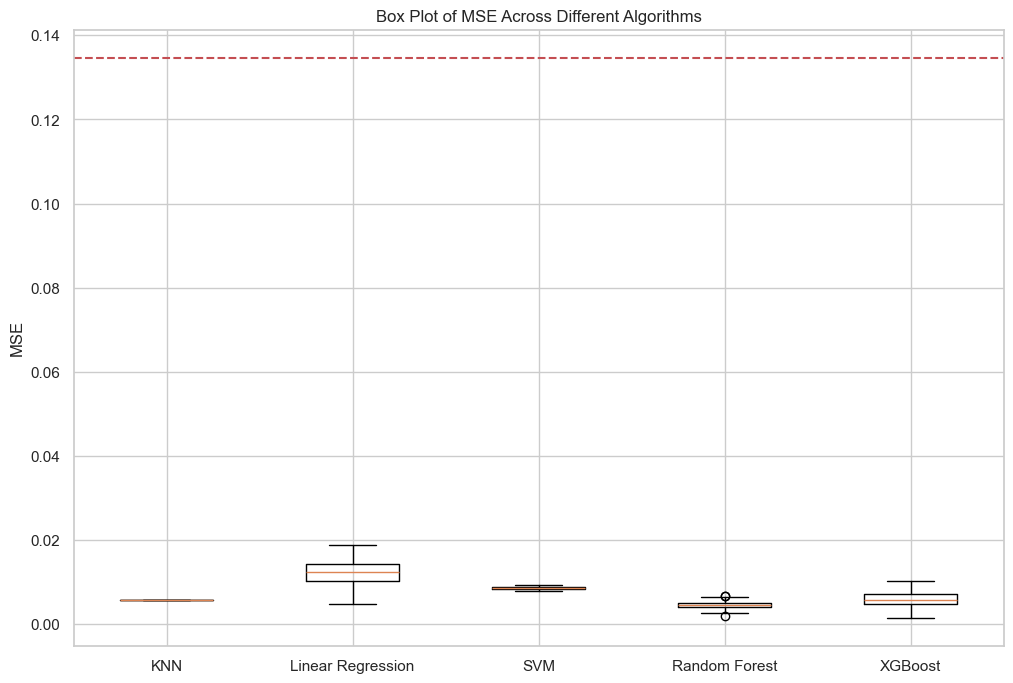

In [109]:
algorithms = ['KNN', 'Linear Regression', 'SVM', 'Random Forest', 'XGBoost']
means = [0.005721735284933511, 0.012242912895345062, 0.00860077650815821, 0.004564265026413544, 0.006218376485573456]
std_devs = [0, 0.002947786080368146, 0.0003364656409532196, 0.0009400416468462928, 0.0017618094738379398, 0.0010582349682854296]

# Generate random data points around the mean based on the standard deviation
np.random.seed(0)  # for reproducibility
data_points = [np.random.normal(loc=mean, scale=std, size=100) if std > 0 else np.full(100, mean) for mean, std in zip(means, std_devs)]

# Plotting the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(data_points, labels=algorithms)
plt.ylabel('MSE')
plt.axhline(y=0.1346452195082573, color='r', linestyle='--', label='Mean Baseline MSE')
plt.title('Box Plot of MSE Across Different Algorithms')
plt.grid(True)
plt.show()

## Permutation feature importance

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pylab as plt


ordinal_ftrs = ['owner'] 
ordinal_cats = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']]
onehot_ftrs = ['fuel', 'seller_type', 'transmission', 'brand']
minmax_ftrs = ['mileage(km/ltr/kg)','max_power_clean','seats']
std_ftrs = ['year', 'km_driven', 'engine']


def ML_pipeline_kfold(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    ordinal_ftrs = ['owner'] 
    ordinal_cats = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']]
    onehot_ftrs = ['fuel', 'seller_type', 'transmission', 'brand']
    minmax_ftrs = ['mileage(km/ltr/kg)','max_power','seats']
    std_ftrs = ['year', 'km_driven', 'engine']
    
    
    preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), minmax_ftrs),
        ('std', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), std_ftrs)
    ])

    pipe = make_pipeline(preprocessor,RandomForestRegressor())

    # the parameter(s) we want to tune
    param_grid = {
                  'randomforestregressor__max_depth': [1, 3, 10, 30, 100], # no upper bound so the values are evenly spaced in log
                  'randomforestregressor__max_features': [0.25, 0.5,0.75,1.0] # linearly spaced because it is between 0 and 1, 0 is omitted
                 } 
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1,verbose=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, X_test, y_test

In [57]:
model, X_test, y_test = ML_pipeline_kfold(X,y,42,4)
print(model.best_score_)
print(model.score(X_test,y_test))
print(model.best_params_)

# save the output so I can use it later
import pickle
file = open('results/grid.save', 'wb')
pickle.dump((model,X_test,y_test),file)
file.close()

Fitting 4 folds for each of 20 candidates, totalling 80 fits
0.9393978896703906
0.9392428051145958
{'randomforestregressor__max_depth': 100, 'randomforestregressor__max_features': 0.25}


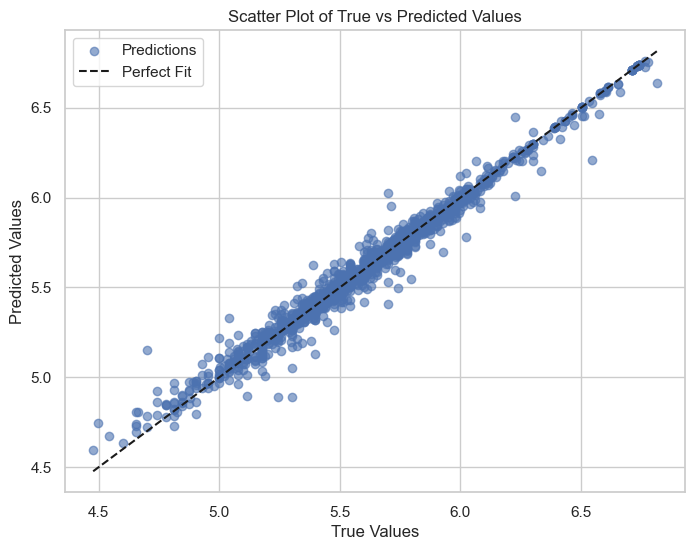

In [102]:
# Assuming 'model' is already trained and 'X_test', 'y_test' are set
predicted_values = model.predict(X_test)

# Now, create the scatter plot with the line of perfect fit
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Fit')
plt.title('Scatter Plot of True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
ftr_names = X.columns

In [ ]:
import pickle
file = open('results/grid.save', 'rb')
model, X_test, y_test = pickle.load(file)
file.close()

np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = model.score(X_test, y_test)  # Default is R² if model.score is used
print('Test score (R²) = ', test_score)

# Calculate baseline MSE for comparison
baseline_mse = mean_squared_error(y_test, [np.mean(y_test)] * len(y_test))
print('Test baseline MSE = ', baseline_mse)

# Loop through the features
ftr_names = X_test.columns
for i in range(len(ftr_names)):
    print('Shuffling ' + str(ftr_names[i]))
    mse_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        # Shuffle individual feature
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        shuffle_score = model.score(X_test_shuffled, y_test)  # Assuming default R²
        mse_shuffled = mean_squared_error(y_test, model.predict(X_test_shuffled))
        mse_scores.append(mse_shuffled)
    average_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)
    print('   Shuffled test MSE:', np.around(average_mse, 3), '+/-', np.around(std_mse, 3))
    scores[i] = mse_scores

Test score (R²) =  0.9392428051145958
Test baseline MSE =  0.12921526606875028
Shuffling year
   Shuffled test MSE: 0.057 +/- 0.001
Shuffling km_driven
   Shuffled test MSE: 0.011 +/- 0.0
Shuffling fuel
   Shuffled test MSE: 0.012 +/- 0.0
Shuffling seller_type
   Shuffled test MSE: 0.008 +/- 0.0
Shuffling transmission
   Shuffled test MSE: 0.012 +/- 0.0
Shuffling owner
   Shuffled test MSE: 0.009 +/- 0.0
Shuffling mileage(km/ltr/kg)
   Shuffled test MSE: 0.01 +/- 0.0
Shuffling engine
   Shuffled test MSE: 0.018 +/- 0.0
Shuffling max_power
   Shuffled test MSE: 0.037 +/- 0.001
Shuffling seats
   Shuffled test MSE: 0.009 +/- 0.0
Shuffling brand
   Shuffled test MSE: 0.012 +/- 0.0


### Permutation Importance

/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_67149/4185162319.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores[sorted_indices].T, labels=ftr_names[sorted_indices], vert=False, widths=0.6)
/var/folders/2f/bfcb1xl92l1g4l4tmzgtdnxh0000gn/T/ipykernel_67149/4185162319.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


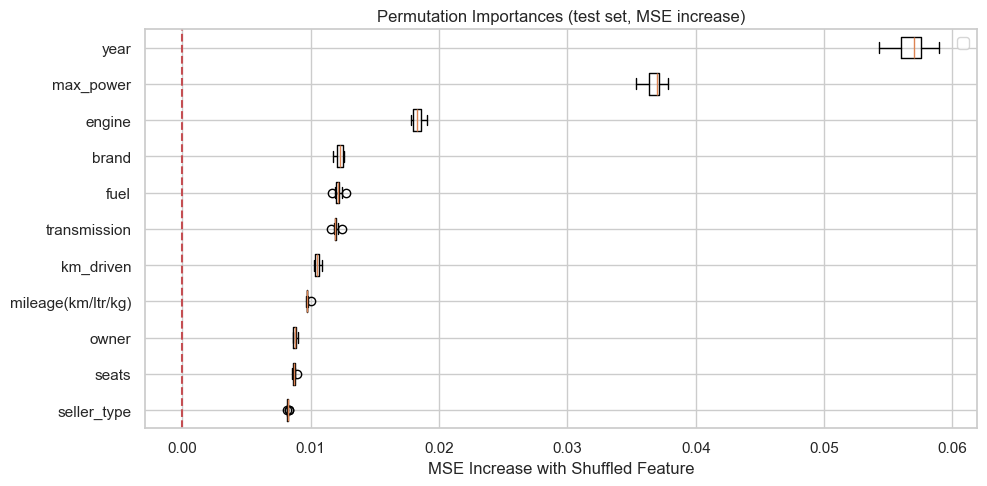

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `scores` contain MSE scores from the feature permutation importance calculation
# Calculate the average MSE increase per feature when shuffled
mean_scores = np.mean(scores, axis=1)
std_scores = np.std(scores, axis=1)
sorted_indices = np.argsort(mean_scores)  # sort features by importance (higher MSE means more important)

plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(10, 5))  # Adjusted for better visibility
plt.boxplot(scores[sorted_indices].T, labels=ftr_names[sorted_indices], vert=False, widths=0.6)
plt.axvline(x=0, color='r', linestyle='--')
plt.title("Permutation Importances (test set, MSE increase)")
plt.xlabel('MSE Increase with Shuffled Feature')
plt.legend()
plt.tight_layout()
plt.show()

### Shap Values

In [61]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pylab as plt


def ML_pipeline_kfold(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    ordinal_ftrs = ['owner'] 
    ordinal_cats = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']]
    onehot_ftrs = ['fuel', 'seller_type', 'transmission', 'brand']
    minmax_ftrs = ['mileage(km/ltr/kg)','max_power','seats']
    std_ftrs = ['year', 'km_driven', 'engine']
    
    
    preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler())
        ]), minmax_ftrs),
        ('std', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), std_ftrs)
    ])

    pipe = make_pipeline(preprocessor,RandomForestRegressor())

    # the parameter(s) we want to tune
    param_grid = {
                  'randomforestregressor__max_depth': [1, 3, 10, 30, 100], # no upper bound so the values are evenly spaced in log
                  'randomforestregressor__max_features': [0.25, 0.5,0.75,1.0] # linearly spaced because it is between 0 and 1, 0 is omitted
                 } 
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1,verbose=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    feature_names = grid.best_estimator_[0].get_feature_names_out()
    return grid, np.array(feature_names), X_test, y_test


grid, feature_names, X_test, y_test = ML_pipeline_kfold(X,y,42,4)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)
print(feature_names)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
0.9388195168033492
0.9393706937914079
{'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.25}
['ord__owner' 'onehot__fuel_CNG' 'onehot__fuel_Diesel' 'onehot__fuel_LPG'
 'onehot__fuel_Petrol' 'onehot__seller_type_Dealer'
 'onehot__seller_type_Individual' 'onehot__seller_type_Trustmark Dealer'
 'onehot__transmission_Automatic' 'onehot__transmission_Manual'
 'onehot__brand_Ambassador' 'onehot__brand_Ashok' 'onehot__brand_Audi'
 'onehot__brand_BMW' 'onehot__brand_Chevrolet' 'onehot__brand_Daewoo'
 'onehot__brand_Datsun' 'onehot__brand_Fiat' 'onehot__brand_Force'
 'onehot__brand_Ford' 'onehot__brand_Honda' 'onehot__brand_Hyundai'
 'onehot__brand_Isuzu' 'onehot__brand_Jaguar' 'onehot__brand_Jeep'
 'onehot__brand_Kia' 'onehot__brand_Land' 'onehot__brand_Lexus'
 'onehot__brand_MG' 'onehot__brand_Mahindra' 'onehot__brand_Maruti'
 'onehot__brand_Mercedes-Benz' 'onehot__brand_Mitsubishi'
 'onehot__brand_Nis

In [62]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set 
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(1626, 48)
(1000, 48)


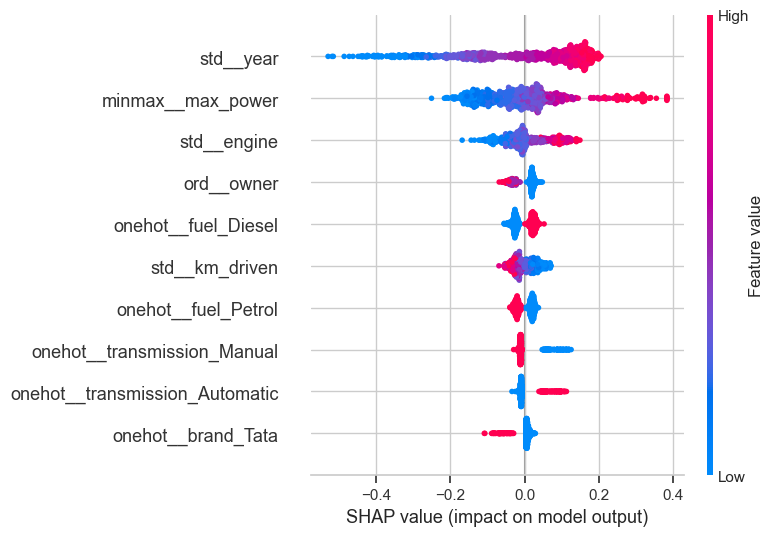

In [63]:
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = feature_names, max_display=10)

In [64]:
# Force plot for the first prediction in the test set
shap.force_plot(explainer.expected_value, shap_values[0], X_test_transformed[0], feature_names=feature_names)

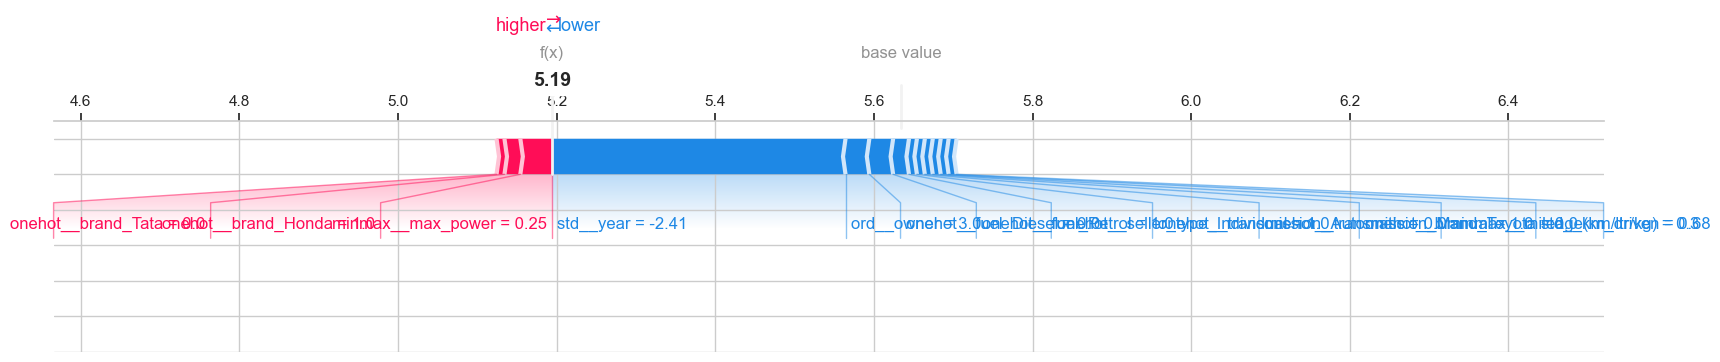

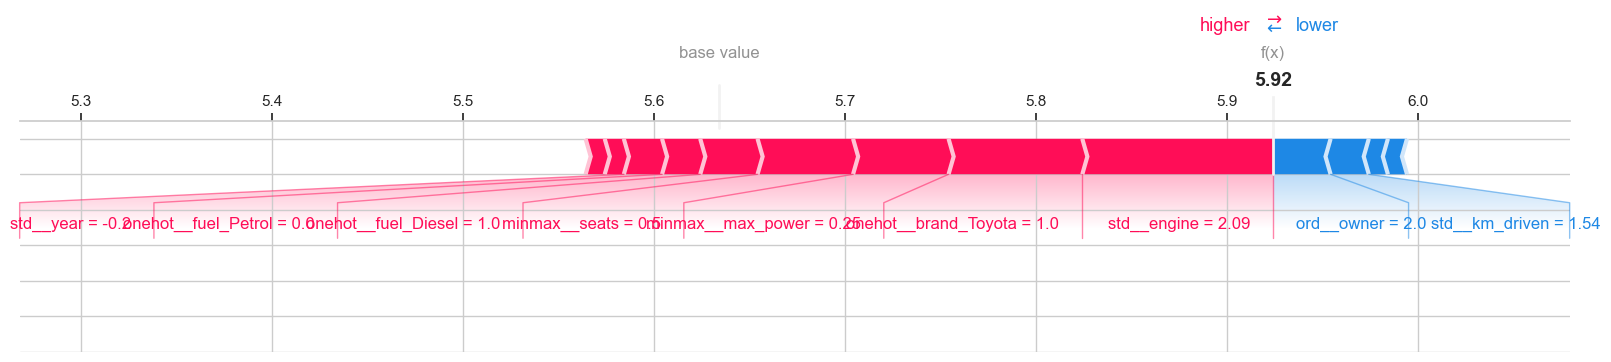

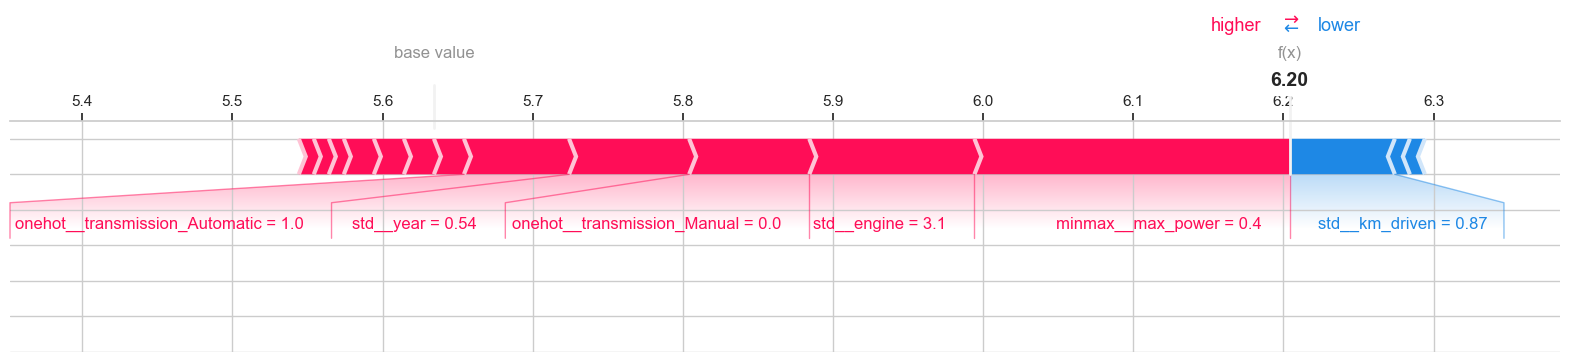

In [65]:
indices = [0, 100, 200]

# Loop over specified indices to generate SHAP force plots
for idx in indices:
    # Ensure index is within the range of X_test_transformed
    if idx < len(X_test_transformed):
        # Calculate SHAP values for the selected instance
        shap_values_instance = explainer.shap_values(X_test_transformed[idx])

        # Display the force plot for the current instance
        shap.force_plot(explainer.expected_value, np.around(shap_values_instance, decimals=2), np.around(X_test_transformed[idx], decimals=2), feature_names=feature_names, matplotlib=True)
        plt.show()


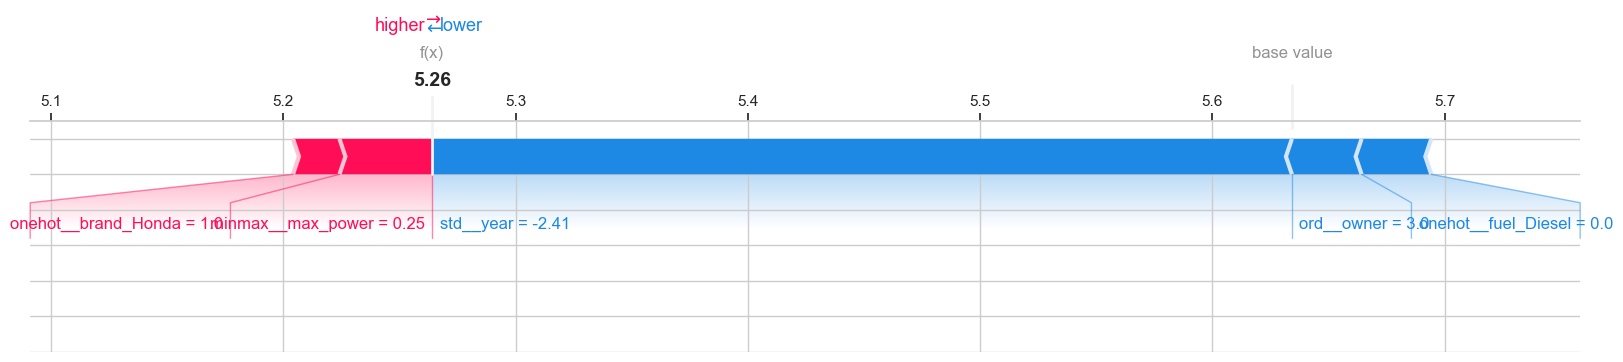

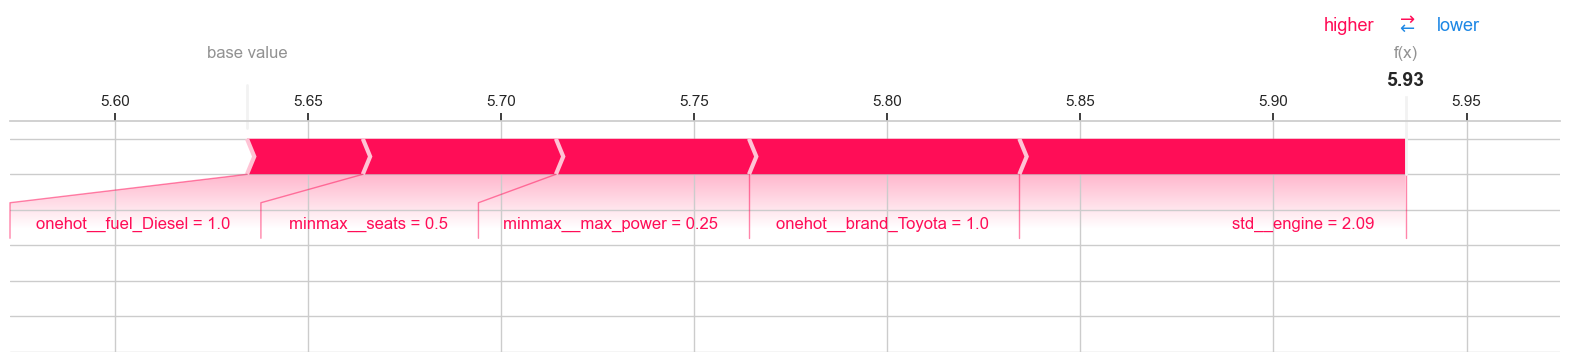

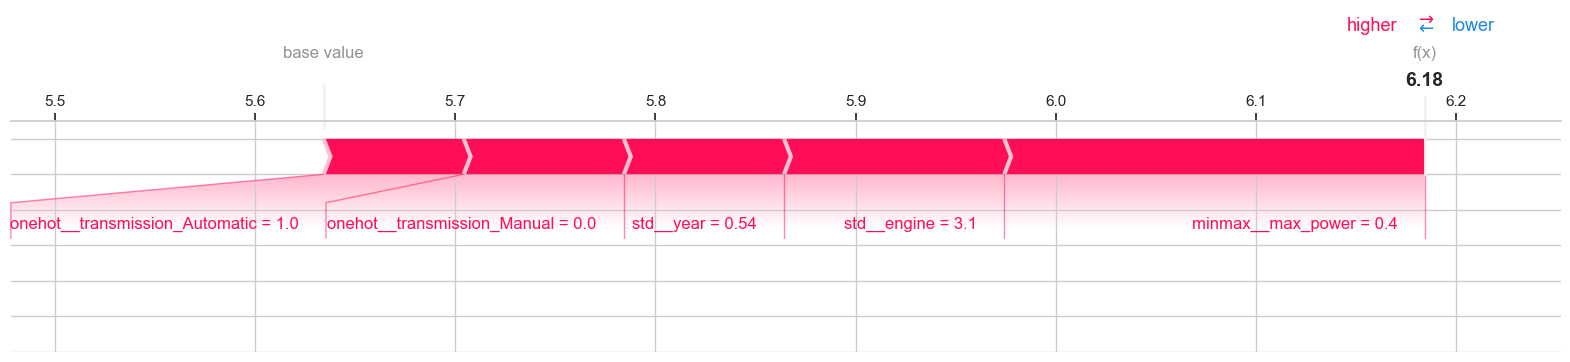

In [94]:
# Adjust the shap_values_instance to focus on the top contributing features
import numpy as np

for idx in indices:
    if idx < len(X_test_transformed):
        shap_values_instance = explainer.shap_values(X_test_transformed[idx])
        # Get indices of features with highest absolute SHAP values
        important_indices = np.argsort(-np.abs(shap_values_instance))[:5]  # Top 10 features
        shap.force_plot(
            explainer.expected_value,
            np.around(shap_values_instance[important_indices], decimals=2),
            np.around(X_test_transformed[idx][important_indices], decimals=2),
            feature_names=np.array(feature_names)[important_indices],
            matplotlib=True
        )
        plt.show()


### Gini Importance

In [66]:
rf_model = grid.best_estimator_.named_steps['randomforestregressor']

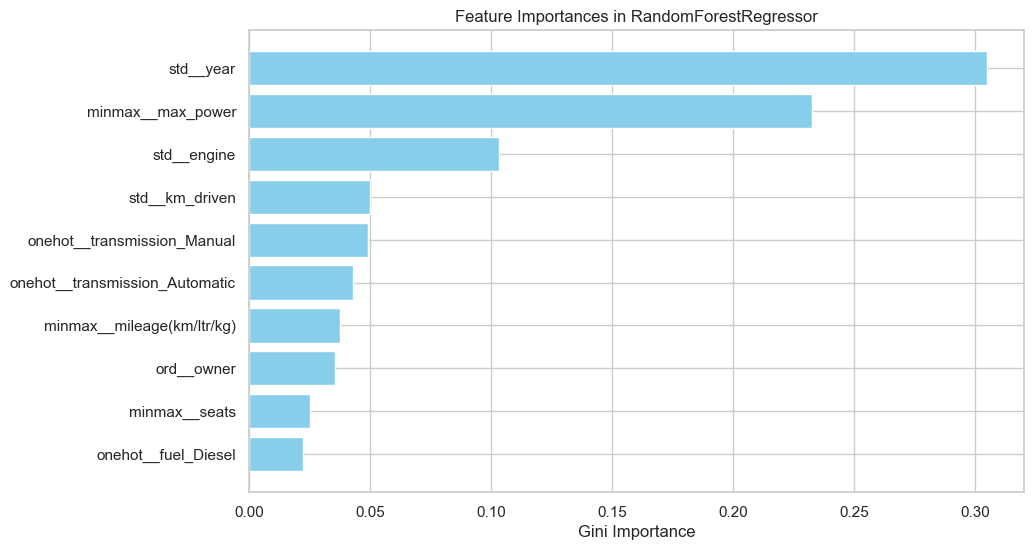

In [67]:
# Get feature importances
importances = rf_model.feature_importances_

# Assuming you already have feature names correctly associated with your model
feature_names = grid.best_estimator_[0].get_feature_names_out()  # Ensure this matches your actual setup

# Create a DataFrame for feature importances
import pandas as pd
import matplotlib.pyplot as plt
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
# Sort the DataFrame by importance and select the top 10
feature_importances = feature_importances.sort_values('importance', ascending=False).head(10)


# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in RandomForestRegressor")
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel("Gini Importance")
plt.gca().invert_yaxis()  # Most important features at the top
plt.show()